### Lab: 7 Apply EM algorithm to cluster a set of data stored in a .CSV file. Use the same data set for clustering using k-Means algorithm. Compare the results of these two algorithms and comment on the quality of clustering. You can add Java/Python ML library classes/API in the program.

c:\Users\sunay\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


accuracy_score 0.8933333333333333
confusion_matrix
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]
accuracy_score 0.0
confusion_matrix
 [[ 0 50  0]
 [ 5  0 45]
 [50  0  0]]
Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.


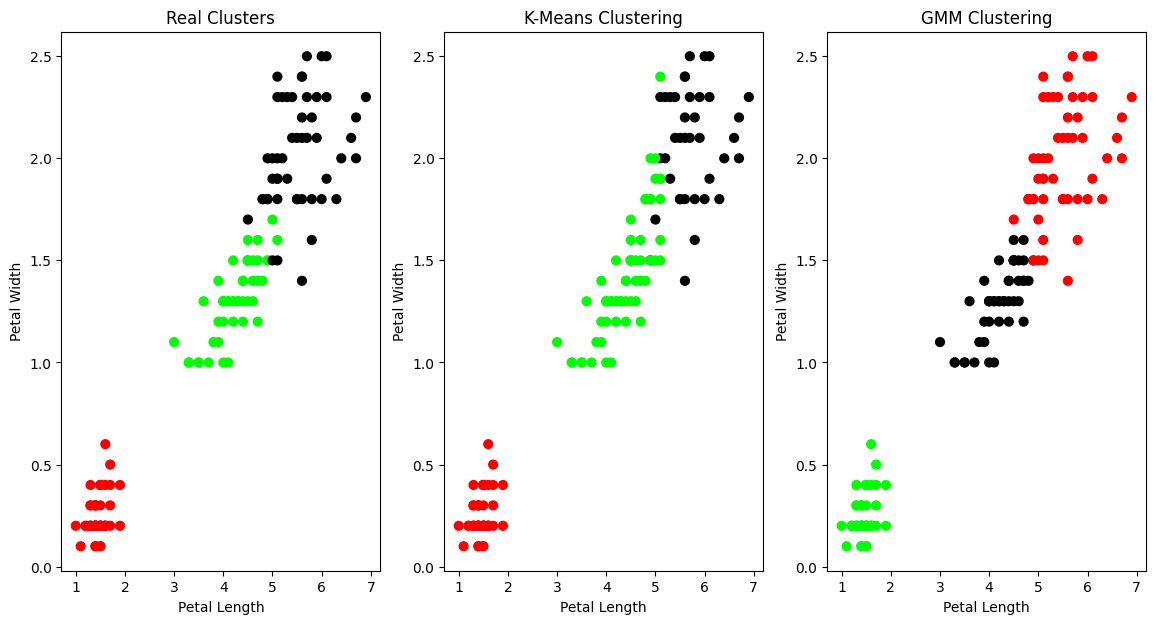

: 

In [4]:
from sklearn import datasets 
from sklearn.cluster import KMeans 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np

# import some data to play with 
iris = datasets.load_iris()
X = pd.DataFrame(iris.data)
X.columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'] 
y = pd.DataFrame(iris.target)
y.columns = ['Targets']

# Build the K Means Model
model = KMeans(n_clusters=3)
model.fit(X) # model.labels_ : Gives cluster no for which samples belongs to

# # Visualise the clustering results
plt.figure(figsize=(14,7))
colormap = np.array(['red', 'lime', 'black'])

# Plot the Original Classifications using Petal features
plt.subplot(1, 3, 1)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y.Targets], s=40) 
plt.title('Real Clusters')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')

# Plot the Models Classifications
plt.subplot(1, 3, 2)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[model.labels_], s=40) 
plt.title('K-Means Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
print("accuracy_score", accuracy_score(y.Targets, model.labels_))
print("confusion_matrix\n", confusion_matrix(y.Targets,model.labels_))

# General EM for GMM
from sklearn import preprocessing
from sklearn.mixture import GaussianMixture 

# transform your data such that its distribution will have a # mean value 0 and standard deviation of 1.
scaler = preprocessing.StandardScaler() 
scaler.fit(X)
xsa = scaler.transform(X)
xs = pd.DataFrame(xsa, columns = X.columns)
gmm = GaussianMixture(n_components=3) 
gmm.fit(xs)
y_gmm = gmm.predict(xs)

plt.subplot(1, 3, 3)
plt.scatter(X.Petal_Length, X.Petal_Width, c=colormap[y_gmm], s=40) 
plt.title('GMM Clustering')
plt.xlabel('Petal Length') 
plt.ylabel('Petal Width')
print("accuracy_score", accuracy_score(y.Targets, y_gmm))
print("confusion_matrix\n", confusion_matrix(y.Targets, y_gmm))

print('Observation: The GMM using EM algorithm based clustering matched the true labels more closely than the Kmeans.')